In [2]:
import sys
sys.path.insert(1, "..")

from utils import llm_api
from exposure.tasks import key_values
import numpy as np
import random
import string
import pandas as pd
import re
from tqdm import tqdm
import matplotlib.pyplot as plt
from exposure.tasks import letters

In [55]:
SAMPLES = 100
LENGTHS = [200, 500, 1000, 2000]
MODEL = "gpt-3.5-turbo"

In [61]:
each = string.ascii_uppercase
pattern = r"\('?(\D)'?: ?(\d+)\)"

df = {
    "letter": [],
    "error": [],
    "position": [],
    "length": []
}

for length in LENGTHS:
    for _ in tqdm(range(SAMPLES), desc=f"length: {length}"):
        prompt = letters.make_random_prompt(length, each)

        response = llm_api.ask(questions=[
            "Count the number of each capital letter in the next text. Output like ('letter': 'count) for all letters present in the text.",
            prompt
        ], model=MODEL)

        
        result = letters.get_letter_counts(response)

        for tu in result:
            letter = tu[0]
            count = tu[1]
            gt = letters.get_gt(prompt, letter)
            error = abs(gt - count)
            df["letter"].append(letter)
            df["error"].append(error)
            df["position"].append(prompt.find(letter))
            df["length"].append(length)
df = pd.DataFrame(df)

length: 2000: 100%|██████████| 100/100 [02:40<00:00,  1.61s/it]


In [63]:
df.to_csv("gpt-3.5-turbo.csv", index=0)
# df = pd.read_csv("gpt-3.5-turbo.csv")

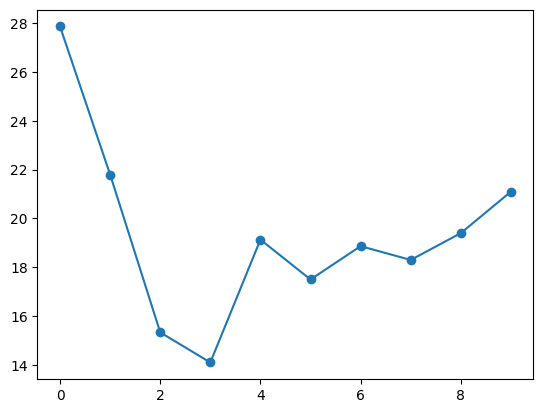

In [50]:
tmp_2 = df[df["length"] == 1000][["error", "position"]].groupby("position").mean().reset_index()
tmp_2 = tmp_2[tmp_2['position'] >= 0]
tmp_2["position"] = tmp_2["position"] // 200
tmp_2 = tmp_2.groupby("position").mean().reset_index()
plt.plot(
    tmp_2["position"],
    tmp_2["error"],
    marker="o"
)

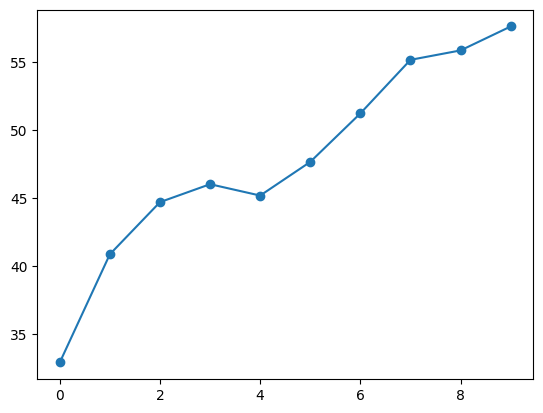

In [62]:
tmp_2 = df[df["length"] == 1000][["error", "position"]].groupby("position").mean().reset_index()
tmp_2 = tmp_2[tmp_2['position'] >= 0]
tmp_2["position"] = tmp_2["position"] // 200
tmp_2 = tmp_2.groupby("position").mean().reset_index()
plt.plot(
    tmp_2["position"],
    tmp_2["error"],
    marker="o"
)